<a href="https://colab.research.google.com/github/zahraDehghanian97/Multilayer_Perceptron/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisit

In [2]:
try :
  %tensorflow_version 2.x
except:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical


## mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g71YkuzkjS6fFKZ2GywhViMSmKAK12ZwfQ2sCIEDVm4XBjuufcxdRU
Mounted at /content/drive


# **make dataset ready**

In [3]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

filename = "/content/drive/MyDrive/Colab Notebooks/YearPredictionMSD.txt"
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
min_max_scaler = preprocessing.MinMaxScaler()
y =preprocessing.LabelEncoder().fit_transform( np.array(dataset)[:,0])
features= preprocessing.MinMaxScaler().fit_transform(np.array(dataset)[:,1:])
Processed_set = []
for i in range(len(y)):
  temp =np.append( np.array(y[i]) , np.array(features[i]))
  Processed_set.append(temp)
np.random.shuffle(Processed_set)


use 1000 data to find best parameter

In [ ]:
temp_set = Processed_set[:1000]
train_validate, test = np.split(temp_set, [int(.9*len(temp_set))])
print(len(train_validate),len(test))
num_clasess = len(np.unique(np.array(Processed_set)[:,0]))
x_train = train_validate[:,1:]
y_train = train_validate[:,0]
x_test = test[:,1:]
y_test = test[:,0]

900 100


# **make Model Classification**

# number of layers

model 90-500-250-125-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(500, activation='relu'))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 500)               45500     
_________________________________________________________________
dense_62 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_63 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_64 (Dense)             (None, 89)                11214     
Total params: 213,339
Trainable params: 213,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 4.0891 - accuracy: 0.0700


*model* 90-250-125-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 250)               22750     
_________________________________________________________________
dense_66 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_67 (Dense)             (None, 89)                11214     
Total params: 65,339
Trainable params: 65,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.5013 - accuracy: 0.0800


model 90-125-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 125)               11375     
_________________________________________________________________
dense_69 (Dense)             (None, 89)                11214     
Total params: 22,589
Trainable params: 22,589
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.5099 - accuracy: 0.0400


# learning rate

learning rate = 0.1

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.5106 - accuracy: 0.0600


learning rate = 0.01

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.4697 - accuracy: 0.0500


learning rate = 0.001

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

4/4 - 0s - loss: 3.5908 - accuracy: 0.0700


# number of neurons

model 90-300-150-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(300, activation='relu'))
model_classification.add(keras.layers.Dense(150, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 300)               27300     
_________________________________________________________________
dense_83 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_84 (Dense)             (None, 89)                13439     
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.6666 - accuracy: 0.0300


model 90-500-250-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(500, activation='relu'))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 500)               45500     
_________________________________________________________________
dense_86 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_87 (Dense)             (None, 89)                22339     
Total params: 193,089
Trainable params: 193,089
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.7679 - accuracy: 0.0500


model 90-200-100-89

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(200, activation='relu'))
model_classification.add(keras.layers.Dense(100, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 200)               18200     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_90 (Dense)             (None, 89)                8989      
Total params: 47,289
Trainable params: 47,289
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.4708 - accuracy: 0.0500


# plot best result

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 250)               22750     
_________________________________________________________________
dense_116 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_117 (Dense)            (None, 89)                11214     
Total params: 65,339
Trainable params: 65,339
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 3.6319 - accuracy: 0.0700


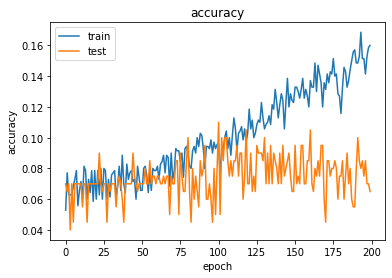

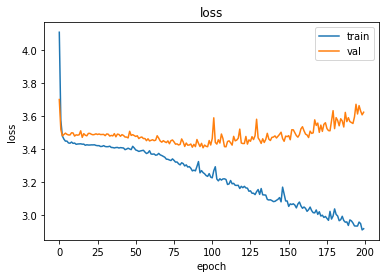

In [ ]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()
# fit model on the dataset
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)
# plot model accuracy and loss 
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# **make Model Regression**

model 90-500-250-125-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(500, activation='relu'))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_144 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_145 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.6993 - mean_squared_error: 83.3077


model 90-250-125-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 250)               22750     
_________________________________________________________________
dense_148 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 126       
Total params: 54,251
Trainable params: 54,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.7653 - mean_squared_error: 86.2693


model 90-125-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 125)               11375     
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 126       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 7.1282 - mean_squared_error: 103.3775


# learning rate

learning rate = 0.1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(500, activation='relu'))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.1), metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_156 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_157 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 7.0448 - mean_squared_error: 102.8743


learning rate = 0.01

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(500, activation='relu'))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_160 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_161 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.9329 - mean_squared_error: 92.9388


learning rate = 0.001

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(500, activation='relu'))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_163 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_164 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_165 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.7801 - mean_squared_error: 88.3100


learning rate = 0.0001

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(500, activation='relu'))
model_regression.add(keras.layers.Dense(250, activation='relu'))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_168 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_169 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.9521 - mean_squared_error: 85.9774


# number of neurons

model 90-125-80-40-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(125, activation='relu'))
model_regression.add(keras.layers.Dense(80, activation='relu'))
model_regression.add(keras.layers.Dense(40, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 500)               45500     
_________________________________________________________________
dense_144 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_145 (Dense)            (None, 125)               31375     
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 126       
Total params: 202,251
Trainable params: 202,251
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.6993 - mean_squared_error: 83.3077


model 90-200-100-50-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(200, activation='relu'))
model_regression.add(keras.layers.Dense(100, activation='relu'))
model_regression.add(keras.layers.Dense(50, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 200)               18200     
_________________________________________________________________
dense_172 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_173 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 51        
Total params: 43,401
Trainable params: 43,401
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.7064 - mean_squared_error: 81.8725


model 90-60-30-15-1

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(60, activation='relu'))
model_regression.add(keras.layers.Dense(30, activation='relu'))
model_regression.add(keras.layers.Dense(15, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 60)                5460      
_________________________________________________________________
dense_176 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_177 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 16        
Total params: 7,771
Trainable params: 7,771
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.9577 - mean_squared_error: 91.6627


# plot best result

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 200)               18200     
_________________________________________________________________
dense_184 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_185 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_186 (Dense)            (None, 1)                 51        
Total params: 43,401
Trainable params: 43,401
Non-trainable params: 0
_________________________________________________________________
4/4 - 0s - loss: 6.9277 - mean_squared_error: 92.2689


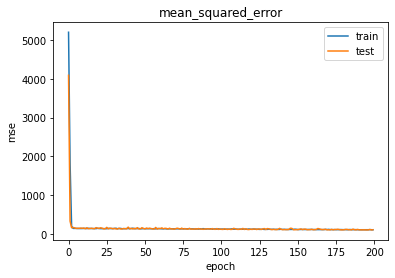

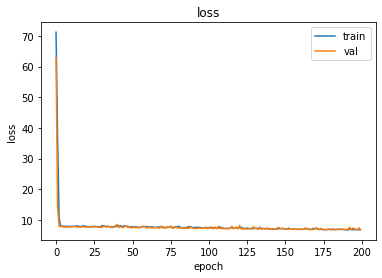

In [ ]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(200, activation='relu'))
model_regression.add(keras.layers.Dense(100, activation='relu'))
model_regression.add(keras.layers.Dense(50, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=200,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)
# mean squere error
plt.plot(history_regression.history['mean_squared_error'])
plt.plot(history_regression.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# loss
plt.plot(history_regression.history['loss'])
plt.plot(history_regression.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# **Comparison**

use all data for training and testing

In [4]:
temp_set = Processed_set
train_validate, test = np.split(temp_set, [int(.9*len(temp_set))])
print(len(train_validate),len(test))
num_clasess = len(np.unique(np.array(Processed_set)[:,0]))
x_train = train_validate[:,1:]
y_train = train_validate[:,0]
x_test = test[:,1:]
y_test = test[:,0]

463810 51535


best classification result 

In [5]:
# create model 
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(250, activation='relu'))
model_classification.add(keras.layers.Dense(125, activation='relu'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['mean_squared_error','accuracy'])
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=200,validation_split=2/9)
# save model
model_classification.save("/content/drive/MyDrive/Colab Notebooks/model_classification")

# # load model
# model_classification = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_classification")

model_classification.summary()
loss_classification , acc_classification, *is_anything_else_being_returned = model_classification.evaluate(x_test,y_test, verbose = 2)




INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/model_classification/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               22750     
_________________________________________________________________
dense_1 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_2 (Dense)              (None, 89)                11214     
Total params: 65,339
Trainable params: 65,339
Non-trainable params: 0
_________________________________________________________________
1611/1611 - 1s - loss: 3.1261 - mean_squared_error: 5812.1226 - accuracy: 0.0929


best regression result

In [6]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(200, activation='relu'))
model_regression.add(keras.layers.Dense(100, activation='relu'))
model_regression.add(keras.layers.Dense(50, activation='relu'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error','accuracy'])
# fit model on the dataset
history_regression = model_regression.fit(x_train,y_train, epochs=200,verbose= False,validation_split=2/9)
# save model
model_regression.save("/content/drive/MyDrive/Colab Notebooks/model_regression")

# # load model
# model_regression = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_regression")
model_regression.summary()
loss_regression, acc_regression, *is_anything_else_being_returned = model_regression.evaluate(x_test,y_test, verbose = 2)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/model_regression/assets
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               18200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 43,401
Trainable params: 43,401
Non-trainable params: 0
_________________________________________________________________
1611/1611 - 1s - loss: 5.8450 - mean_squared_error: 82.9728 - accuracy: 0.0000e+00


# plot final comparison plot

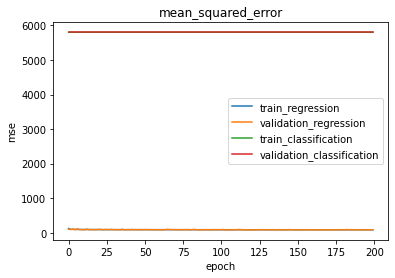

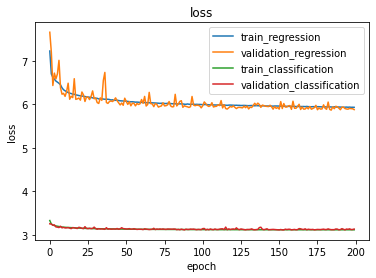

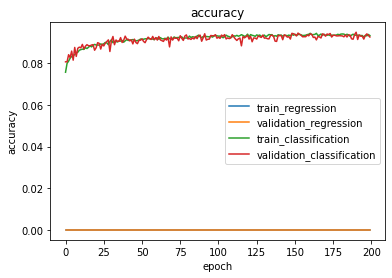

In [7]:
# mean squere error
plt.plot(history_regression.history['mean_squared_error'])
plt.plot(history_regression.history['val_mean_squared_error'])
plt.plot(history_classification.history['mean_squared_error'])
plt.plot(history_classification.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train_regression', 'validation_regression','train_classification','validation_classification'], loc='best')
plt.show()
# loss
plt.plot(history_regression.history['loss'])
plt.plot(history_regression.history['val_loss'])
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_regression', 'validation_regression','train_classification','validation_classification'], loc='best')
plt.show()
# accuracy
plt.plot(history_regression.history['accuracy'])
plt.plot(history_regression.history['val_accuracy'])
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_regression', 'validation_regression','train_classification','validation_classification'], loc='best')
plt.show()
